In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/User/OneDrive/Desktop/hour.csv')
data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
data.rename(columns={'yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'},inplace=True)

In [5]:
#data=data.drop(['instant','dteday'],axis=1)
data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['hour']=data.hour.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weathersit']=data.weathersit.astype('category')

In [6]:
data.dtypes


instant          int64
dteday          object
season        category
year          category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

<AxesSubplot:xlabel='year', ylabel='count'>

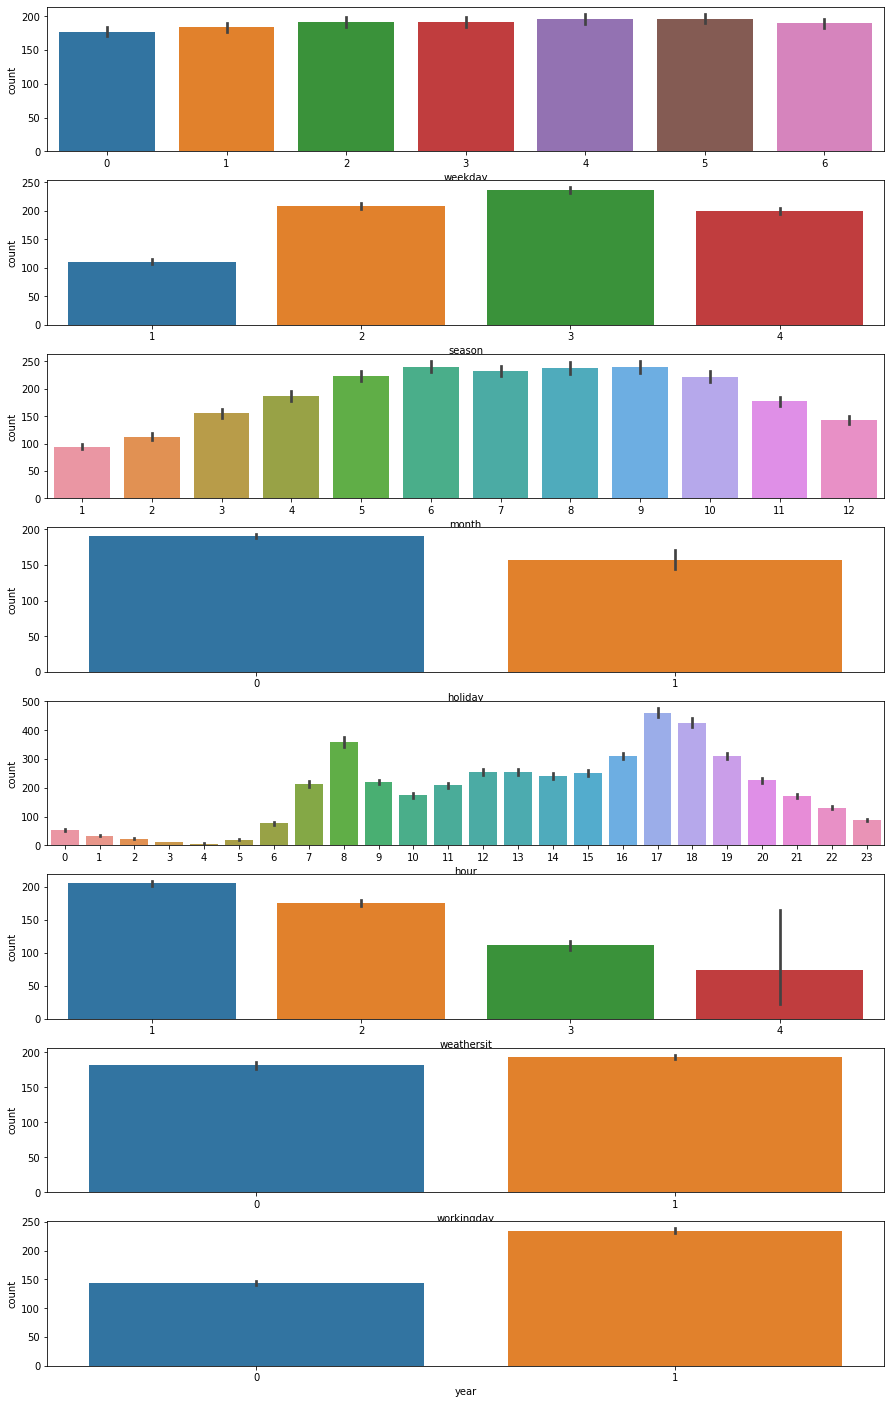

In [7]:
fig,[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=plt.subplots(nrows=8,figsize=(15,25))
sn.barplot(x=data['weekday'],y=data['count'],ax=ax1)
sn.barplot(x=data['season'],y=data['count'],ax=ax2)
sn.barplot(x=data['month'],y=data['count'],ax=ax3)
sn.barplot(x=data['holiday'],y=data['count'],ax=ax4)
sn.barplot(x=data['hour'],y=data['count'],ax=ax5)
sn.barplot(x=data['weathersit'],y=data['count'],ax=ax6)
sn.barplot(x=data['workingday'],y=data['count'],ax=ax7)
sn.barplot(x=data['year'],y=data['count'],ax=ax8)

<AxesSubplot:xlabel='hour', ylabel='count'>

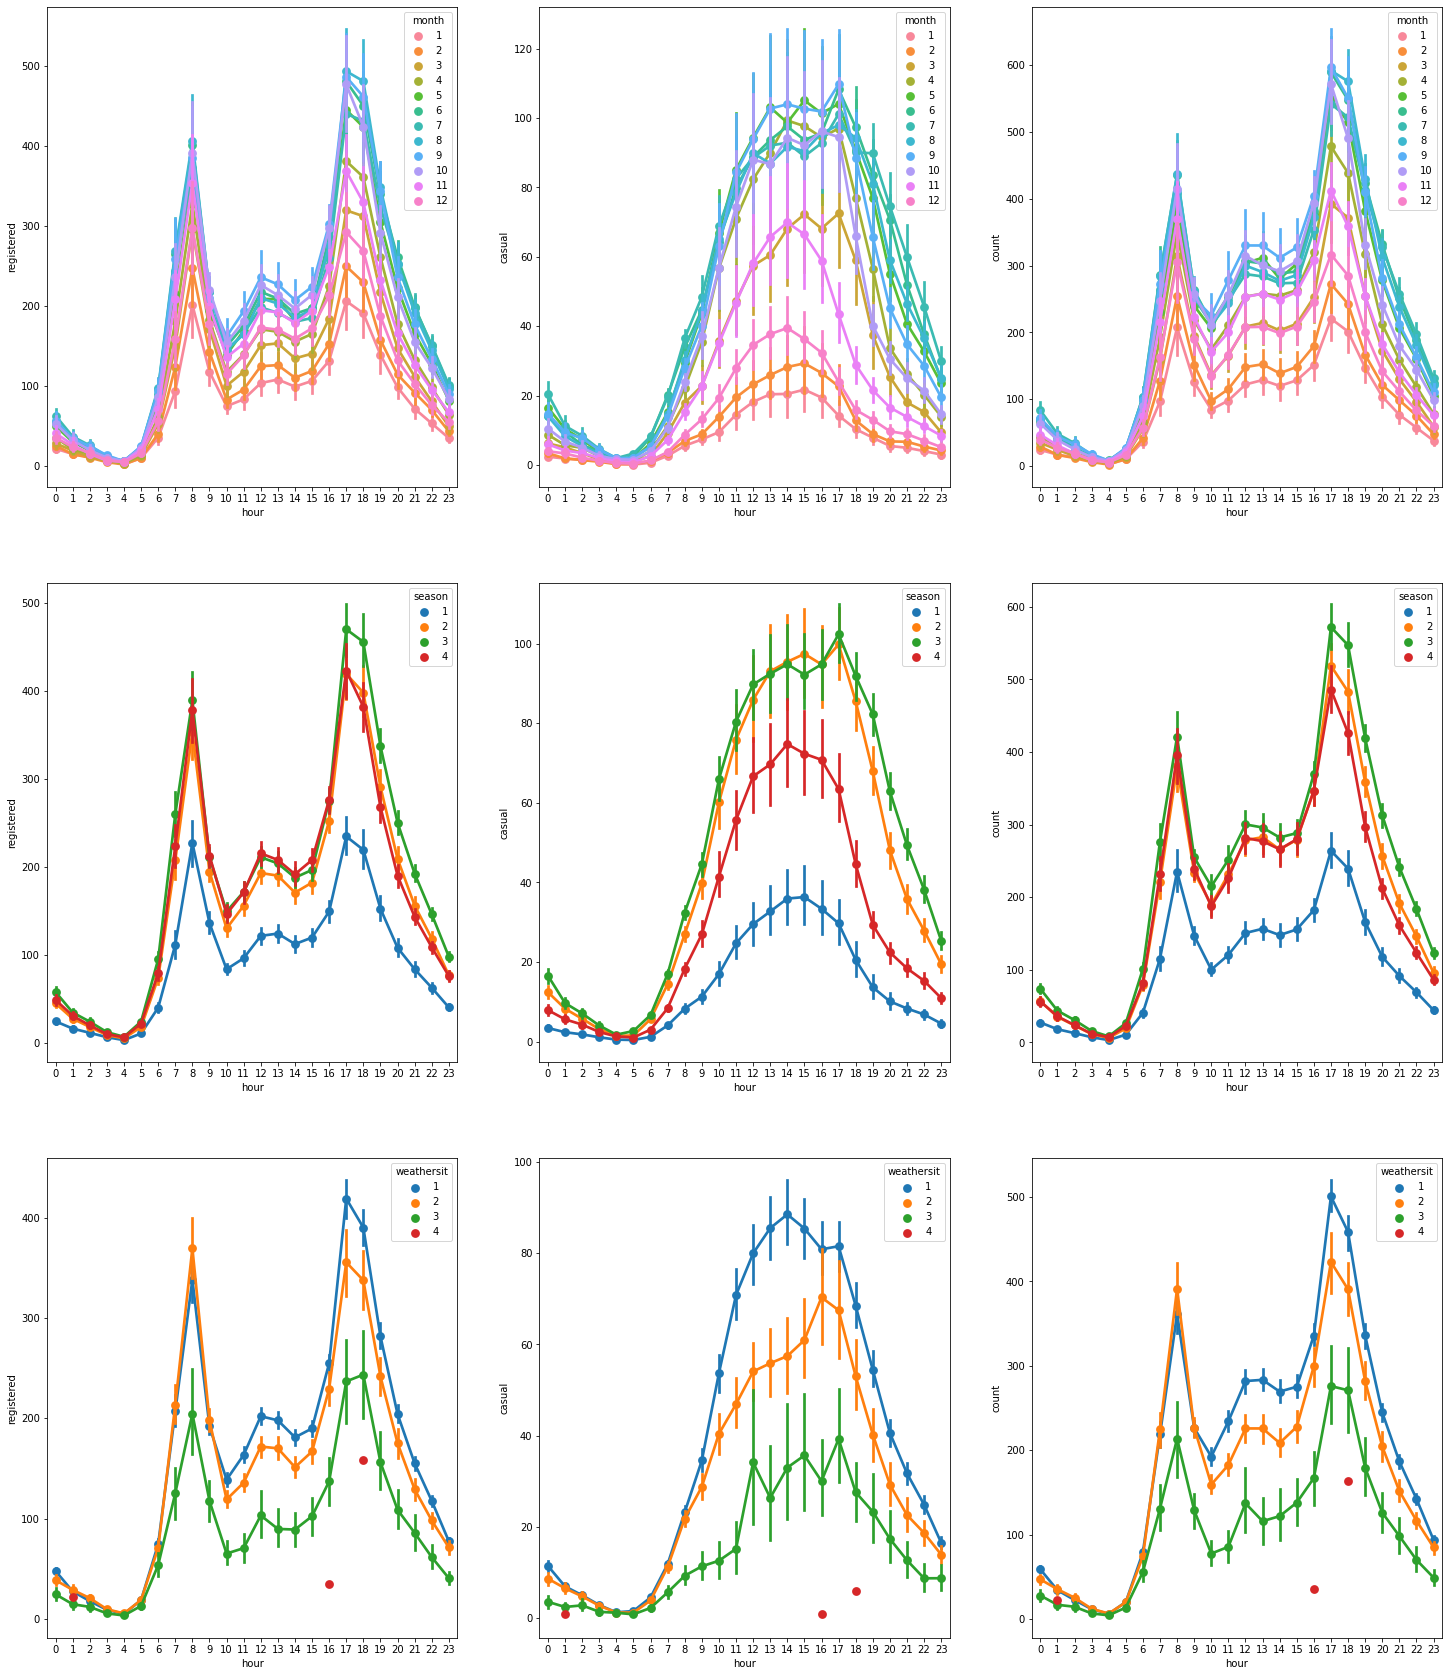

In [8]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(25,30))
sn.pointplot(x='hour',y='registered',hue='month',data=data,ax=axes[0][0])
sn.pointplot(x='hour',y='casual',hue='month',data=data,ax=axes[0][1])
sn.pointplot(x='hour',y='count',hue='month',data=data,ax=axes[0][2])

sn.pointplot(x='hour',y='registered',hue='season',data=data,ax=axes[1][0])
sn.pointplot(x='hour',y='casual',hue='season',data=data,ax=axes[1][1])
sn.pointplot(x='hour',y='count',hue='season',data=data,ax=axes[1][2])

sn.pointplot(x='hour',y='registered',hue='weathersit',data=data,ax=axes[2][0])
sn.pointplot(x='hour',y='casual',hue='weathersit',data=data,ax=axes[2][1])
sn.pointplot(x='hour',y='count',hue='weathersit',data=data,ax=axes[2][2])

[Text(0.5, 1.0, 'Relationship between windspeed and count')]

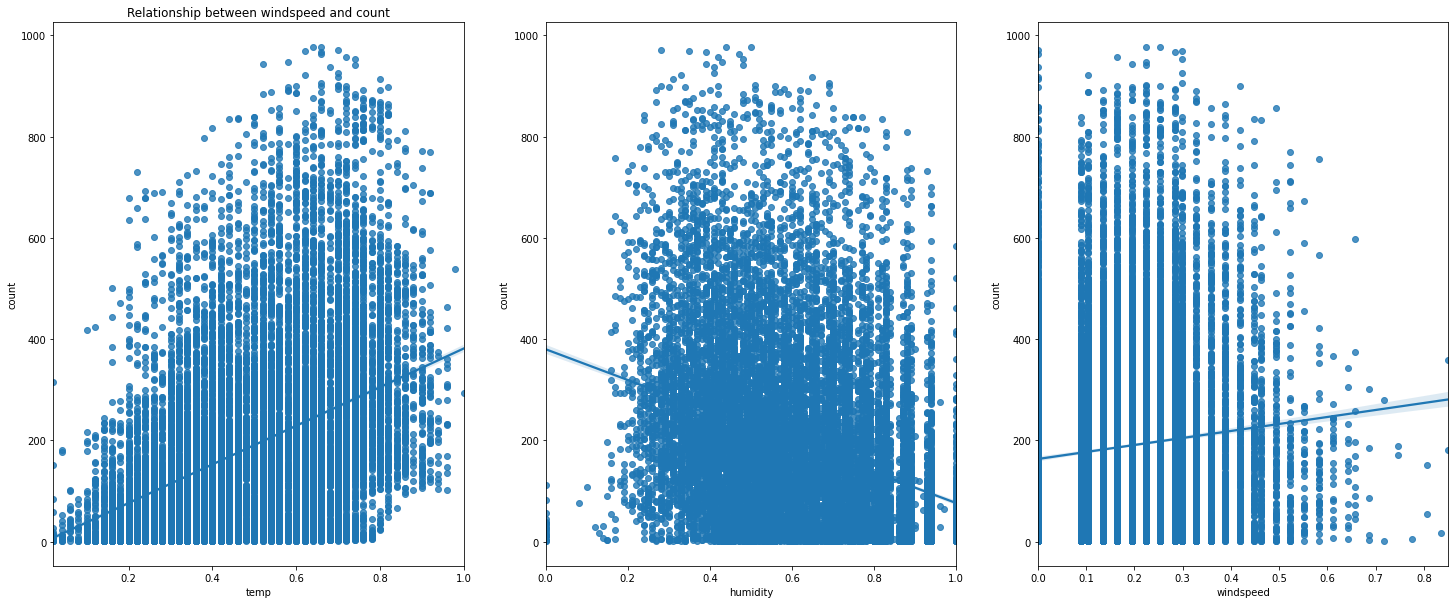

In [9]:
fig,[ax1,ax2,ax3]=plt.subplots(ncols=3,figsize=(25,10))
sn.regplot(x='temp',y='count',data=data,ax=ax1)
ax1.set(title='Relationship between temp and count')
sn.regplot(x='humidity',y='count',data=data,ax=ax2)
ax1.set(title='Relationship between humidity and count')
sn.regplot(x='windspeed',y='count',data=data,ax=ax3)
ax1.set(title='Relationship between windspeed and count')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Relationship between windspeed and count')

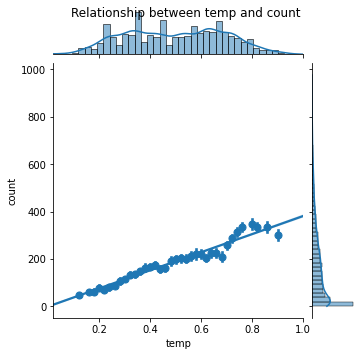

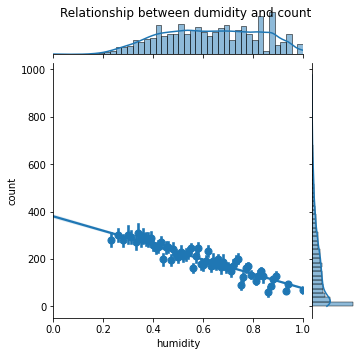

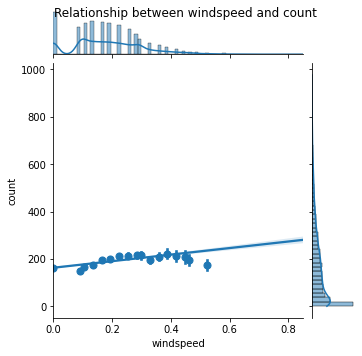

In [10]:

ax1=sn.jointplot(x='temp',y='count',data=data,kind='reg',x_bins=100,x_estimator=np.mean,size=5)
ax1.fig.suptitle('Relationship between temp and count')
ax2=sn.jointplot(x='humidity',y='count',data=data,kind='reg',x_bins=100,x_estimator=np.mean,size=5)
ax2.fig.suptitle('Relationship between dumidity and count')
ax3=sn.jointplot(x='windspeed',y='count',data=data,kind='reg',x_bins=100,x_estimator=np.mean,size=5)
ax3.fig.suptitle('Relationship between windspeed and count')

<AxesSubplot:>

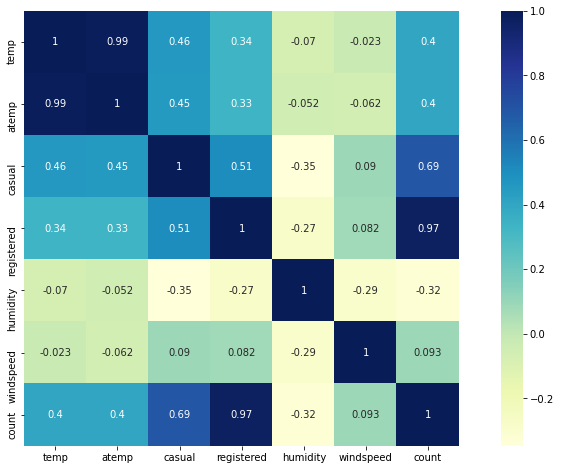

In [11]:
data_cor=data[['temp','atemp','casual','registered','humidity','windspeed','count']].corr()
fig=plt.subplots(figsize=(15,8))
sn.heatmap(data_cor,vmax=1,square=True,annot=True,cmap="YlGnBu")

In [12]:
print(data_cor)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.987672  0.459616    0.335361 -0.069881  -0.023125   
atemp       0.987672  1.000000  0.454080    0.332559 -0.051918  -0.062336   
casual      0.459616  0.454080  1.000000    0.506618 -0.347028   0.090287   
registered  0.335361  0.332559  0.506618    1.000000 -0.273933   0.082321   
humidity   -0.069881 -0.051918 -0.347028   -0.273933  1.000000  -0.290105   
windspeed  -0.023125 -0.062336  0.090287    0.082321 -0.290105   1.000000   
count       0.404772  0.400929  0.694564    0.972151 -0.322911   0.093234   

               count  
temp        0.404772  
atemp       0.400929  
casual      0.694564  
registered  0.972151  
humidity   -0.322911  
windspeed   0.093234  
count       1.000000  


In [13]:
#data=data.drop(['atemp','windspeed','registered','casual'],axis=1)
#data=data.drop(['instant','dteday'],axis=1)
print(data)

       instant      dteday season year month hour holiday weekday workingday  \
0            1  2011-01-01      1    0     1    0       0       6          0   
1            2  2011-01-01      1    0     1    1       0       6          0   
2            3  2011-01-01      1    0     1    2       0       6          0   
3            4  2011-01-01      1    0     1    3       0       6          0   
4            5  2011-01-01      1    0     1    4       0       6          0   
...        ...         ...    ...  ...   ...  ...     ...     ...        ...   
17374    17375  2012-12-31      1    1    12   19       0       1          1   
17375    17376  2012-12-31      1    1    12   20       0       1          1   
17376    17377  2012-12-31      1    1    12   21       0       1          1   
17377    17378  2012-12-31      1    1    12   22       0       1          1   
17378    17379  2012-12-31      1    1    12   23       0       1          1   

      weathersit  temp   atemp  humidit

In [14]:
data_dummy=data
def dummy_dataset(dataframe,vcol):
    dummy_columns=pd.get_dummies(dataframe[vcol],prefix=vcol,drop_first=True)
    new_data=pd.concat([dataframe,dummy_columns],axis=1)
    new_data=new_data.drop([vcol],axis=1)
    return new_data
dcol=['season','month','hour','holiday','weekday','workingday','weathersit','year']
for i in range(0,8):
    data_dummy=dummy_dataset(data_dummy,dcol[i])

print(data_dummy)

       instant      dteday  temp   atemp  humidity  windspeed  casual  \
0            1  2011-01-01  0.24  0.2879      0.81     0.0000       3   
1            2  2011-01-01  0.22  0.2727      0.80     0.0000       8   
2            3  2011-01-01  0.22  0.2727      0.80     0.0000       5   
3            4  2011-01-01  0.24  0.2879      0.75     0.0000       3   
4            5  2011-01-01  0.24  0.2879      0.75     0.0000       0   
...        ...         ...   ...     ...       ...        ...     ...   
17374    17375  2012-12-31  0.26  0.2576      0.60     0.1642      11   
17375    17376  2012-12-31  0.26  0.2576      0.60     0.1642       8   
17376    17377  2012-12-31  0.26  0.2576      0.60     0.1642       7   
17377    17378  2012-12-31  0.26  0.2727      0.56     0.1343      13   
17378    17379  2012-12-31  0.26  0.2727      0.65     0.1343      12   

       registered  count  season_2  ...  weekday_2  weekday_3  weekday_4  \
0              13     16         0  ...        

In [15]:
from sklearn.model_selection import train_test_split
y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

In [16]:
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from numpy import median
from statsmodels.graphics.gofplots import qqplot

from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor

In [17]:
# Comparing performance of the regression models

models = [LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

# A function is wrtten to find out the cross validation score based on mean absolute error

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    mean_dev_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    Scores= pd.DataFrame({'model':[type(model).__name__], 'Mean deviation':[np.mean(mean_dev_scores)],'R Square':[np.mean(r2_scores)]})
    print(Scores)
    
for model in models:
    test_algorithms(model)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.